# Visualización Ecopetrol
---

En este notebook desarrollamos una aplicación del código desarrollado hasta ahora. La secuencia de preprocesamiento ya ha sido realizada (ver `PreprocessPipeline.ipynb` para más detalles). Por lo tanto, aquí se aplicarán las funciones descritas en el notebook `Visualization.ipynb`.

Presentaremos los parámetros calculados, al igual que la motivación financiera por la cual nos interesan estas variables de calidad de mercado. Como ejemplo ilustrativo, aplicaremos el procedimiento desarrollado a una base de datos de precios intradía de la acción de Ecopetrol (ECOPETL). El notebook está organizado de la siguiente manera:

 1. Spread
 2. Profundidad (log-profundidad)
 3. Volumen (log-volumen)
 4. Volatilidad

In [1]:
from Visualization import * # importamos las funciones desarrolladas

import os
import pandas as pd

In [2]:
# Traemos los datos ya preprocesados

pathTesis = os.getcwd()
data = pd.read_csv(os.path.join(pathTesis,'depth_data.csv'))

## Spread
---
El spread cuantifica los costos de ejecución de transacciones pequeñas. Este costo de ejecución se calcula en referencia al precio de mercado ($S_t$), tomado como el punto medio entre los precios de compra ($b_t$) y de venta ($a_t$):

$$S_t = \frac{1}{2}(a_t+b_t)$$

Bajo esta interpretación, el *quoted spread* ($QS_t$) se define como la distancia entre los precios de venta y de compra tomando como referencia el precio medio definido arriba:

$$QS_t = a_t-b_t$$

Un *quoted spread* alto significa que hay mayor discrepancia entre los agentes vendedores y compradores. Esto significa que en un mercado de mayor calidad, el $QS$ será menor que en un mercado de menor calidad.

In [3]:
spread = get_stock_param(data, "ECOPETL", "Spread")
spread.head()

Quoted_Spread                                              \
date_time    2017-03-03 2017-03-06 2017-03-07 2017-03-08 2017-03-09   
date_time                                                             
09:30:00       0.005478   0.004877   0.004529   0.004438   0.005527   
09:45:00       0.004556   0.004006   0.004495   0.003795   0.004241   
10:00:00       0.003869   0.004229   0.004651   0.003795   0.004882   
10:15:00       0.004903   0.004608   0.003781   0.004160   0.003993   
10:30:00       0.004185   0.003909   0.003781   0.004106   0.003899   

                                                                  ...  \
date_time 2017-03-10 2017-03-13 2017-03-14 2017-03-15 2017-03-16  ...   
date_time                                                         ...   
09:30:00    0.005264   0.004221   0.005496   0.004079   0.004808  ...   
09:45:00    0.003810   0.004464   0.004354   0.004977   0.004255  ...   
10:00:00    0.005594   0.003975   0.004513   0.003854   0.003810  ...   
10:15:00    0.003824   0.003978   0.004393   0.003854   0.003921  ...   
10:30:00    0.003905   0.003781   0.004216   0.004138   0.003824  ...   

                                                                             \
date_time 2017-08-17 2017-08-18 2017-08-22 2017-08-23 2017-08-24 2017-08-25   
date_time                                                                     
09:30:00    0.004667   0.004604   0.005455   0.004038   0.004294   0.004281   
09:45:00    0.003670   0.003669   0.003784   0.005069   0.004739   0.003722   
10:00:00    0.003670   0.005694   0.003811   0.003670   0.004705   0.003893   
10:15:00    0.003670   0.006078   0.003656   0.004455   0.004146   0.003717   
10:30:00    0.003660   0.004693   0.003656   0.003646   0.003643   0.003877   

                                                       
date_time 2017-08-28 2017-08-29 2017-08-30 2017-08-31  
date_time                                              
09:30:00    0.003733   0.003872   0.004000   0.003697  
09:45:00    0.003734   0.004687   0.003711   0.003697  
10:00:00    0.004324   0.004782   0.003711   0.003688  
10:15:00    0.003751   0.003761   0.003711   0.003748  
10:30:00    0.003711   0.004525   0.003711   0.004672  

[5 rows x 119 columns]

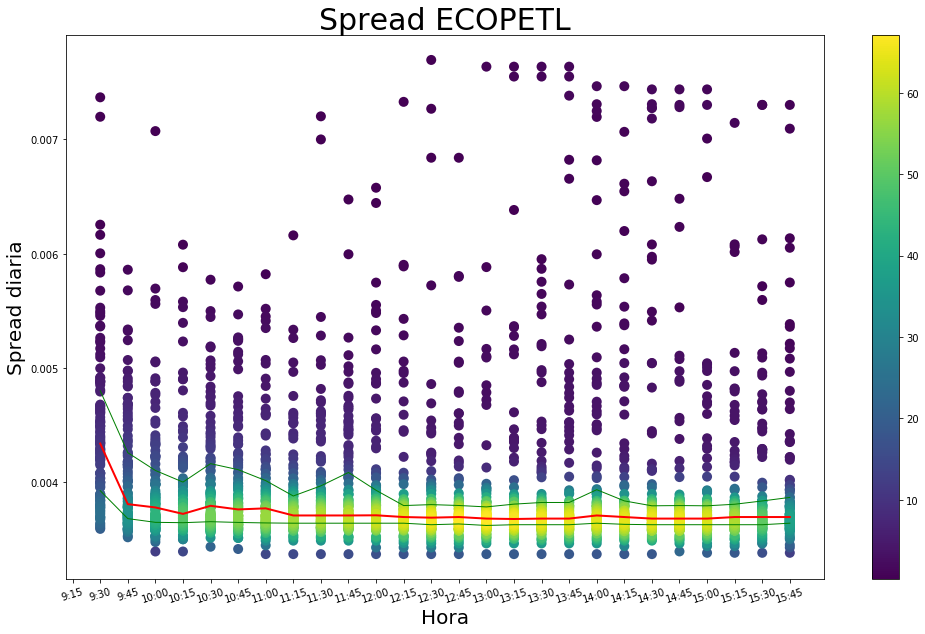

In [4]:
graph(data, "ECOPETL", "Spread")

## Profundidad
---
La profundidad de un mercado nos indica el volumen de acciones disponible para ser transado. Este parámetro puede caracterizarse tanto para las ofertas como para las de ventas. En general, una mayor profundidad es un indicador de una mayor calidad de mercado, ya que indica que hay mejor liquidez a la hora de comprar o vender *shares* de acciones. La fórmula sería entonces la cantidad de *shares* ofertadas para vender sumada con la cantidad ofertada para comprar:

$$D_t = q_t^a + q_t^b$$

Debido a las grandes variaciones de profuncidad entre distintas acciones, muchas veces se trabaja la log-profundidad. Este trabajo se desarrolla bajo aquella convención:

$$\ln(D_t) = \ln(q_t^a) + \ln(q_t^b) = \ln(q_t^a q_t^b)$$

In [5]:
log_depth = get_stock_param(data, "ECOPETL", "log_depth")
log_depth.head()

avg_log_depth                                              \
date_time    2017-03-03 2017-03-06 2017-03-07 2017-03-08 2017-03-09   
date_time                                                             
09:30:00      23.136905  23.610273  24.944539  22.622907  22.768997   
09:45:00      25.180204  24.154801  26.135037  24.163186  26.069469   
10:00:00      21.690069  24.960451  26.657847  23.912855  25.852610   
10:15:00      24.736457  22.343832  21.620458  24.288767  25.938135   
10:30:00      23.843704  27.419417  27.111175  25.507820  23.027624   

                                                                  ...  \
date_time 2017-03-10 2017-03-13 2017-03-14 2017-03-15 2017-03-16  ...   
date_time                                                         ...   
09:30:00   25.878359  27.050959  23.018840  21.818696  22.080442  ...   
09:45:00   24.767793  25.071134  23.820101  22.968037  25.511657  ...   
10:00:00   27.247994  25.838211  27.084961  21.439487  25.677521  ...   
10:15:00   24.571055  25.947005  23.812045  21.945298  21.092617  ...   
10:30:00   27.028081  21.960279  19.703406  24.329822  26.577022  ...   

                                                                             \
date_time 2017-08-17 2017-08-18 2017-08-22 2017-08-23 2017-08-24 2017-08-25   
date_time                                                                     
09:30:00   28.310406  21.916902  23.720218  19.464536  22.681523  27.738225   
09:45:00   23.809783  21.531887  27.093578  19.624070  23.049571  25.608635   
10:00:00   28.360416  20.977852  25.578448  19.584548  26.358420  29.976866   
10:15:00   21.782397  21.123932  25.748117  25.221241  22.062413  27.935154   
10:30:00   25.101033  21.809116  23.019698  26.489090  21.810256  26.305448   

                                                       
date_time 2017-08-28 2017-08-29 2017-08-30 2017-08-31  
date_time                                              
09:30:00   23.868823  26.101691  23.378649  22.814437  
09:45:00   24.338342  25.315178  23.700508  22.334435  
10:00:00   25.253866  23.509080  22.709669  25.113159  
10:15:00   26.505208  29.699876  28.439250  22.274763  
10:30:00   25.749896  24.159333  21.136552  23.554649  

[5 rows x 119 columns]

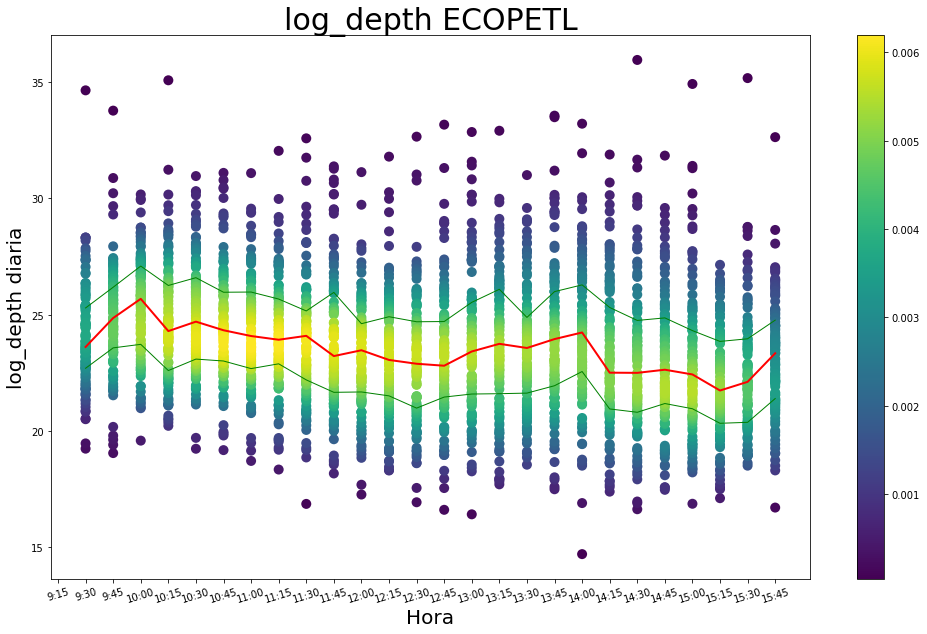

In [6]:
graph(data, "ECOPETL", "log_depth")

## Volumen
---

El volumen puede cuantificarse de dos maneras distintas: la primera es el total de dinero que circula en las transacciones de compra y venta de acciones. La segunda medida es que el volumen es el número de *shares* de acciones transadas. Nuestra base de datos define el volumen como la cantidad de *shares* que se compran o venden en una orden.

La calidad de mercado es mayor a mayor volumen transado, ya que esto implica que el mercado tiene una buena liquidez. Por lo tanto, los participantes de este pueden entrar y salir de sus posiciones deseadas fácilmente.

In [7]:
volumen = get_stock_param(data, "ECOPETL", "Log-volumen")
volumen.head()

date_time,2017-03-03,2017-03-06,2017-03-07,2017-03-08,2017-03-09,2017-03-10,2017-03-13,2017-03-14,2017-03-15,2017-03-16,...,2017-08-17,2017-08-18,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-28,2017-08-29,2017-08-30,2017-08-31
date_time,,,,,,,,,,,,,,,,,,,,,
09:30:00,11.784882,13.480703,14.684590,12.639111,12.542927,13.252484,13.756823,13.704729,13.625571,13.754265,...,14.284561,11.099922,12.942787,10.771659,11.218219,14.132757,14.377181,13.383960,13.705510,11.657883
09:45:00,13.048751,13.509140,11.910083,13.455557,13.366087,12.846591,12.463660,13.761402,10.616388,13.665369,...,9.259226,10.186295,13.082566,10.366781,10.768485,12.435202,15.514273,13.453256,11.959846,12.008968
10:00:00,12.176469,11.673530,12.314003,12.477221,12.737615,11.225257,13.739612,13.277281,8.148735,11.128865,...,11.653565,10.688051,13.575292,10.115004,11.015131,13.349673,14.180009,11.520775,12.038665,13.022835
10:15:00,13.251780,12.475775,12.741489,12.230512,9.606428,12.732365,12.219546,11.842164,9.596147,12.729821,...,10.066116,10.696638,10.085851,11.719525,13.877416,13.178436,14.609371,9.808132,10.116621,13.252147
10:30:00,12.634629,8.272826,11.191356,12.136192,13.206706,12.952424,12.270614,11.826999,13.998911,11.782128,...,12.881226,10.389918,11.794421,13.219570,12.308679,14.149581,13.317175,12.480362,12.257797,14.658611


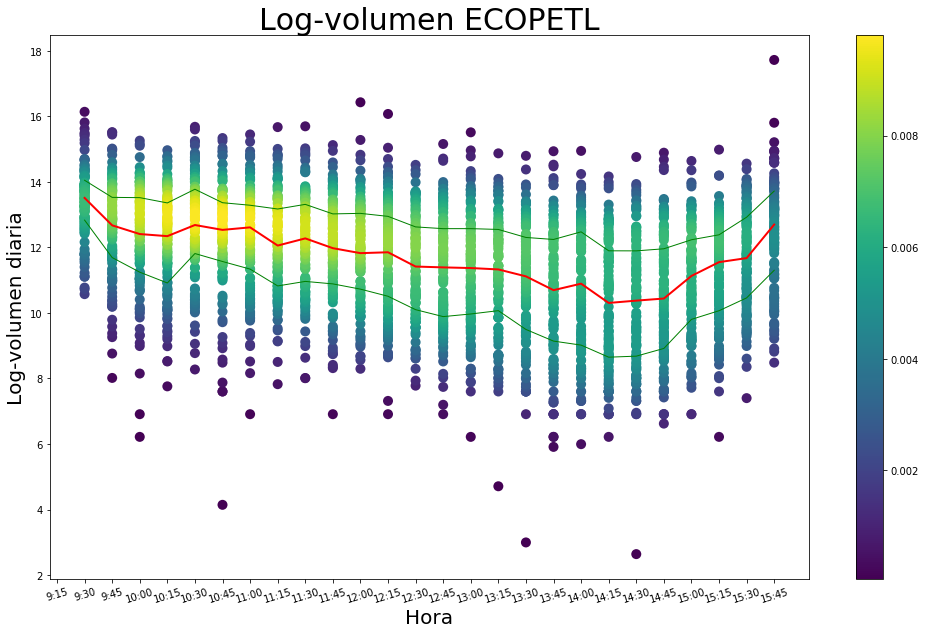

In [8]:
graph(data, "ECOPETL", "Log-volumen")

## Volatilidad
---
La volatilidad es una medida de la magnitud de las fluctuaciones de un precio. Puede interpretarse como el costo de la incertidumbre en el valor de un activo. Debido a la poca profundidad del mercado colombiano, en este trabajo se utiliza la volatilidad basada en rango definida como:

$$RR_{t, i}^{\Delta} = \frac{1}{4\ln(2)}\left[ \ln(H_{t, i}) - \ln(L_{t, i}) \right]$$

donde $H_{t, i}$ y $L_{t, i}$ corresponden a los precios máximos y mínimos en un intervalo de tiempo de longitud $\Delta$.

In [9]:
volatility = get_stock_param(data, "ECOPETL", "Volatilidad diaria")
volatility.head()

precio                                                         \
date_time 2017-03-03 2017-03-06 2017-03-07 2017-03-08 2017-03-09 2017-03-10   
date_time                                                                     
09:30:00    0.022922   0.033930   0.045498   0.011396   0.011661   0.045845   
09:45:00    0.011396   0.011353   0.011353   0.011396   0.000000   0.011439   
10:00:00    0.011353   0.011396   0.022663   0.011396   0.011707   0.000000   
10:15:00    0.011353   0.011396   0.011353   0.011396   0.000000   0.011483   
10:30:00    0.011310   0.011396   0.000000   0.011310   0.011707   0.011527   

                                                       ...             \
date_time 2017-03-13 2017-03-14 2017-03-15 2017-03-16  ... 2017-08-17   
date_time                                              ...              
09:30:00    0.022835   0.034715   0.011572   0.022835  ...   0.033181   
09:45:00    0.000000   0.023278   0.011572   0.011439  ...   0.000000   
10:00:00    0.011353   0.023368   0.000000   0.011439  ...   0.011019   
10:15:00    0.011353   0.011661   0.000000   0.022922  ...   0.000000   
10:30:00    0.011353   0.011661   0.011572   0.011483  ...   0.010979   

                                                                             \
date_time 2017-08-18 2017-08-22 2017-08-23 2017-08-24 2017-08-25 2017-08-28   
date_time                                                                     
09:30:00    0.022080   0.011019   0.010979   0.010979   0.011019   0.022161   
09:45:00    0.011019   0.021999   0.011019   0.010939   0.011019   0.011142   
10:00:00    0.000000   0.010979   0.000000   0.010939   0.000000   0.011184   
10:15:00    0.011019   0.010979   0.011019   0.010939   0.010979   0.022326   
10:30:00    0.011019   0.010979   0.021918   0.000000   0.000000   0.011142   

                                            
date_time 2017-08-29 2017-08-30 2017-08-31  
date_time                                   
09:30:00    0.011184   0.022326   0.011101  
09:45:00    0.022409   0.000000   0.000000  
10:00:00    0.011184   0.011142   0.011101  
10:15:00    0.000000   0.011142   0.000000  
10:30:00    0.011184   0.011142   0.011101  

[5 rows x 119 columns]

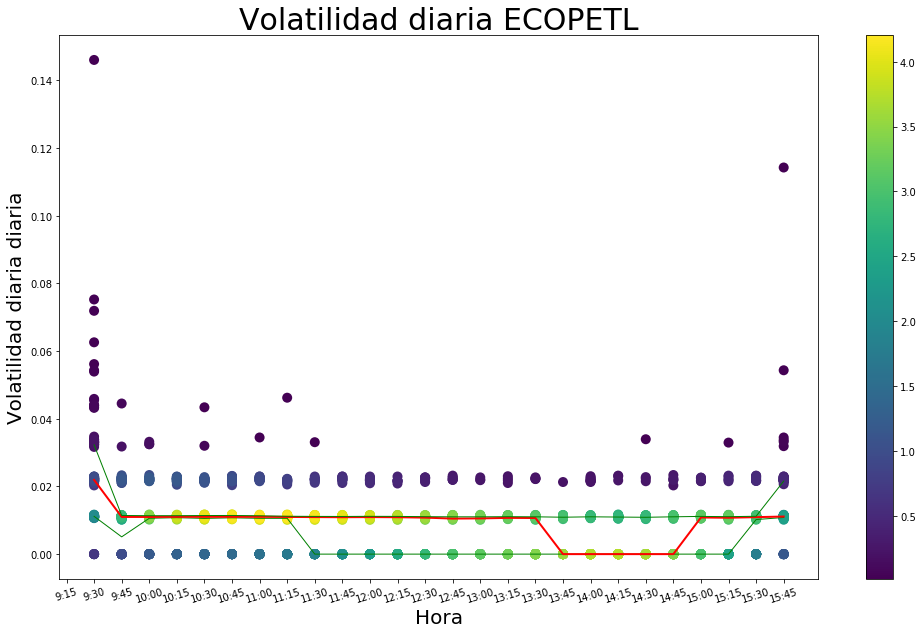

In [11]:
graph(data, "ECOPETL", "Volatilidad diaria")